In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stat
from statsmodels.formula.api import ols

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/joaquinmenendez/JIS-2020/main/data/adminsion_universidad.csv')

Qué tengo en mi dataset?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gmat             30 non-null     int64  
 1   gpa              30 non-null     float64
 2   work experience  30 non-null     int64  
 3   admitted         28 non-null     float64
 4   score            29 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.3 KB


In [ ]:
df.describe()

,gmat,gpa,work experience,admitted,score
count,30.000000,30.000000,30.000000,28.000000,29.000000
mean,650.000000,3.150000,3.666667,0.535714,70.517241
std,63.734363,0.664234,1.667816,0.507875,14.831484
min,540.000000,1.700000,1.000000,0.000000,43.000000
25%,590.000000,2.700000,2.000000,0.000000,59.000000
50%,660.000000,3.300000,4.000000,1.000000,71.000000
75%,690.000000,3.700000,5.000000,1.000000,81.000000
max,780.000000,4.000000,6.000000,1.000000,95.000000


Tengo casos faltantes?

In [ ]:
df.isna().sum()

,0
gmat,0
gpa,0
work experience,0
admitted,2
score,1


Cual es el promedio de GMAT?

In [ ]:
df.mean()

,0
gmat,650.000000
gpa,3.150000
work experience,3.666667
admitted,0.535714
score,70.517241


Cuál es el promedio de años trabajados de los que fueron aceptados?

In [ ]:
df.groupby('admitted')['work experience'].mean()

,work experience
admitted,
0.0,2.533333
1.0,4.800000


In [ ]:
df.query("admitted > 0")

,gmat,gpa,work experience,admitted,score
1,660,3.3,6,1.0,78.0
2,740,3.3,5,1.0,94.0
4,660,4.0,4,1.0,79.0
10,710,3.7,5,1.0,81.0
11,660,3.3,5,1.0,79.0
12,780,4.0,3,1.0,91.0
17,650,3.7,6,1.0,77.0
18,620,3.3,2,1.0,71.0
19,750,3.9,4,1.0,91.0
20,730,3.7,6,1.0,95.0


In [ ]:
df.groupby('admitted').mean()

,gmat,gpa,work experience,score
admitted,,,,
0.0,618.461538,2.753846,2.538462,58.416667
1.0,688.000000,3.620000,4.800000,82.266667


Tengo casos faltantes. Que debo hacer?

In [ ]:
df.isna().sum()

,0
gmat,0
gpa,0
work experience,0
admitted,2
score,1


In [ ]:
df[df.admitted.isna()]

,gmat,gpa,work experience,admitted,score
3,590,1.7,4,NaN,60.0
7,550,2.7,1,NaN,50.0


In [ ]:
df.groupby('admitted')['score'].min()

,score
admitted,
0.0,43.0
1.0,71.0


In [ ]:
df.loc[df.admitted.isna(),'admitted'] = 0

In [ ]:
df[df.score.isna()]

,gmat,gpa,work experience,admitted,score
29,590,2.3,3,0.0,NaN


In [ ]:
df.groupby('admitted')['score'].mean()

,score
admitted,
0.0,57.928571
1.0,82.266667


In [ ]:
df[df.gmat <= 600]

,gmat,gpa,work experience,admitted,score
0,580,2.7,4,0.0,65.0
3,590,1.7,4,0.0,60.0
5,540,2.7,2,0.0,55.0
7,550,2.7,1,0.0,50.0
8,580,2.3,2,0.0,52.0
15,550,2.3,4,0.0,43.0
16,580,3.3,1,0.0,49.0
22,570,3.0,2,0.0,46.0
29,590,2.3,3,0.0,NaN


In [ ]:
df[df.gmat.lt(600)].groupby('admitted')['score'].mean()

,score
admitted,
0.0,52.5


In [ ]:
df.loc[df.score.isna(), 'score'] = 52.5
df

,gmat,gpa,work experience,admitted,score
0,580,2.7,4,0.0,65.0
1,660,3.3,6,1.0,78.0
2,740,3.3,5,1.0,94.0
3,590,1.7,4,0.0,60.0
4,660,4.0,4,1.0,79.0
5,540,2.7,2,0.0,55.0
6,690,2.3,1,0.0,70.0
7,550,2.7,1,0.0,50.0
8,580,2.3,2,0.0,52.0
9,620,2.7,2,0.0,59.0


Que variable es la mejor "predictora" para ser admitido

<Axes: >

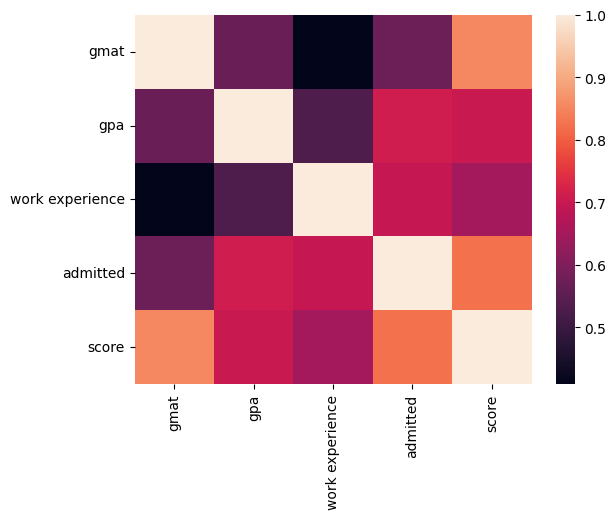

In [ ]:
import seaborn as sns # Libreria para plotear, mas linda que matplotlib y con graficos útiles
sns.heatmap(df.corr())

In [ ]:
df.corr().round(3)

,gmat,gpa,work experience,admitted,score
gmat,1.000,0.570,0.409,0.606,0.858
gpa,0.570,1.000,0.529,0.720,0.716
work experience,0.409,0.529,1.000,0.691,0.649
admitted,0.606,0.720,0.691,1.000,0.841
score,0.858,0.716,0.649,0.841,1.000


In [ ]:
df.corr()['admitted'] > 0.7

,admitted
gmat,False
gpa,True
work experience,False
admitted,True
score,True


### Quiero saber si hay una diferencia estadística entre los alumnos que trabajan al menos 4 años y los que no en su Score final

La experiencia laboral esta normalmente distribuida? y el gmat?

Cual neccesito que sea normal y homogenea para comparar los grupos?

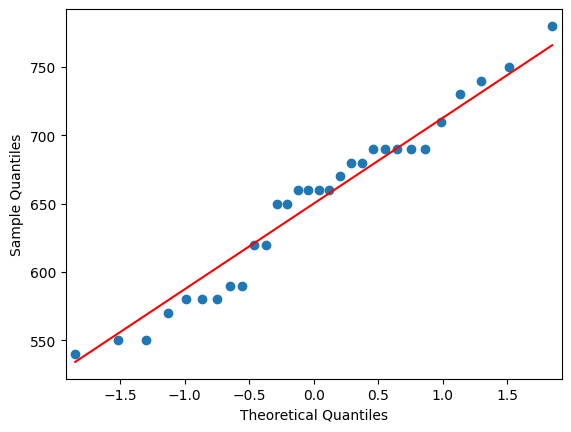

In [ ]:
_ = sm.qqplot(df['gmat'], line ='s')

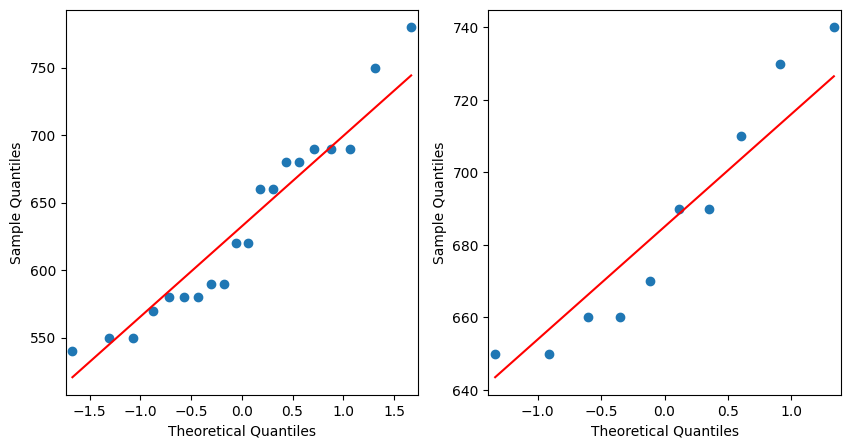

In [ ]:
fig, axs = plt.subplots (1,2, figsize = (10,5))
_ = sm.qqplot(df[df['work experience'] <= 4]['gmat'], line ='s', ax = axs[0])
_ = sm.qqplot(df[df['work experience'] > 4]['gmat'], line ='s', ax = axs[1])

In [ ]:
s, p = stat.shapiro(df[df['work experience'].le(4)]['gmat'])
print('Fumadores', f'Shapiro Wilk = {s:.2f}',f'p-value = {p:.2f}', sep='\n')

Fumadores
Shapiro Wilk = 0.93
p-value = 0.15


In [ ]:
s, p = stat.shapiro(df[df['work experience'].gt(4)]['gmat'])
print('Fumadores', f'Shapiro Wilk = {s:.2f}',f'p-value = {p:.2f}', sep='\n')

Fumadores
Shapiro Wilk = 0.90
p-value = 0.22


In [ ]:
s, p = stat.bartlett(df[df['work experience'].gt(4)]['gmat'], df[df['work experience'].le(4)]['gmat'])
print('Homoceasticidad de varianza',
      f'Bartlet (T) = {s:.2f}',
      f'p-value = {p:.2f}', sep = '\n')

Homoceasticidad de varianza
Bartlet (T) = 5.13
p-value = 0.02


En cuanto explica el GMAT el score final del candidato?

In [ ]:
model_formula="score ~ gmat + gpa"
r_model = ols(formula=model_formula, data = df).fit()
print(r_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     58.46
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           1.54e-10
Time:                        15:38:49   Log-Likelihood:                -98.079
No. Observations:                  30   AIC:                             202.2
Df Residuals:                      27   BIC:                             206.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -55.4086     12.863     -4.308      0.0

In [ ]:
df.gmat.describe()

,gmat
count,30.000000
mean,650.000000
std,63.734363
min,540.000000
25%,590.000000
50%,660.000000
75%,690.000000
max,780.000000


<Axes: xlabel='score', ylabel='gmat'>

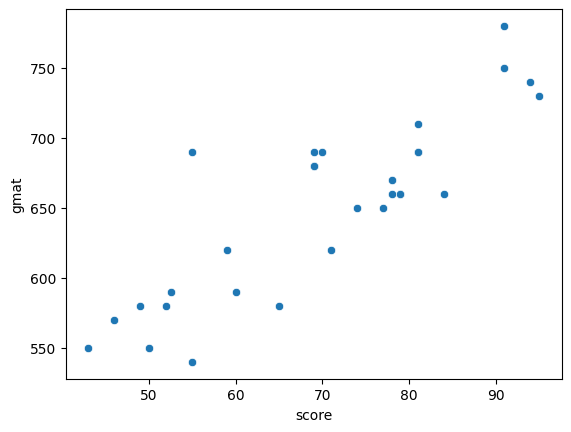

In [ ]:
sns.scatterplot(df, x='score', y='gmat')

<Axes: xlabel='score', ylabel='gpa'>

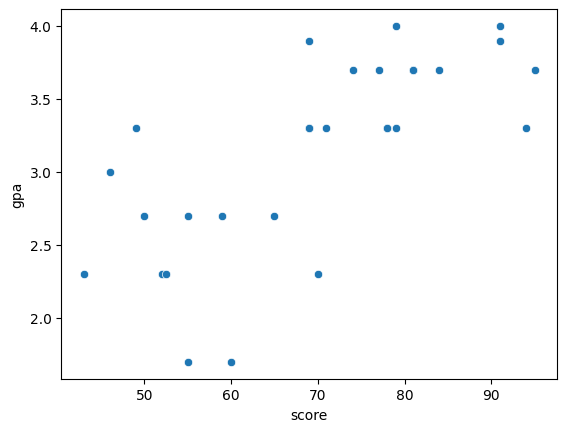

In [ ]:
sns.scatterplot(df, x='score', y='gpa')

In [ ]:
r_model.predict({'gmat': [630], 'gpa':[4.0]})

,0
0,73.226789


In [ ]:
def sumar (a, b):
    return a + b

sumar(4, 'cuatro')

TypeError: unsupported operand type(s) for +: 'int' and 'str'